<a href="https://colab.research.google.com/github/A01793509/Equipo38/blob/main/Arboldedecision_Equipo38.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Alberto Jose Garcia Porras (A01793509)
*   Carlos Julio León Caicedo (A01793947)
*   Luis Fernando Ríos Piedra (A00453954)
*   Marco Antonio Vázquez Morales (A01793704)
*   Nicolás Emmanuel Juárez Valenzuela (A01325071)


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [15]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests, zipfile

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from io import BytesIO

#**Ejercicio-1.** 

In [8]:
#A continuación cargaremos los datos del ejercicio. En este caso descargamos el archivo 'SouthGermanCredit.asc' desde el repositorio indicado y lo cargamos 
#en la carpeta 'Actividad7' de nuestro repositorio local. Teniendo en cuenta que el archivo viene con separación por espacios, debemos indicar el parámetro 
#'sep=" "' para que lo formatee correctamente.
#df = pd.read_csv("/content/Actividad7/SouthGermanCredit.asc", sep=" ")

#df.head()

#Este metodo es para poder leer directametne desde el zip y directamente de la URL donde esta la zip sin descargar nada

#Defining the zip file URL
ruta = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00522/SouthGermanCredit.zip'

# Split URL to get the file name
archivo = ruta.split('/')[-1]

req = requests.get(ruta)

# extracting the zip file contents
archivo_zip= zipfile.ZipFile(BytesIO(req.content))
archivo_zip.extractall('/content/sample_data/SouthGermanCredit')
df = pd.read_csv("/content/sample_data/SouthGermanCredit/SouthGermanCredit.asc",sep=' ')

df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [9]:
#Una vez cargados los datos en nuestro dataframe, procedemos a cambiar el nombre de las columnas realizando la traducción respectiva de acuerdo a lo indicado 
#en la descripción del dataset. En este caso asignaremos a la lista 'cols_ingles' el nombre que queremos darle a cada columna en el respectivo orden.
cols_ingles = ["status", "duration", "credit_history", "purpose", "amount", "savings", "employment_duration", "installment_rate", "personal_status_sex", 
               "other_debtors", "present_residence", "property", "age", "other_installment_plans", "housing", "number_credits", "job", "people_liable", 
               "telephone", "foreign_worker", "credit_risk"]

#cols_espanol = ["estado", "duracion", "historial_crediticio", "proposito", "monto", "ahorros", "duracion_empleo", "valor_cuota", "estado_personal_sexo", 
#               "otros_deudores", "residencia_actual", "propiedad", "edad", "otros_planes_financiacion", "casa", "numero_de_creditos", "cargo", 
#               "persona_confiable", "telefono", "trabajador_extranjero", "riesgo_credito"]

#Renombramos las columnas asignando la lista con los nombres a la propiedad columns del dataframe
df.columns=cols_ingles
#df.columns=cols_espanol

df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


#**Ejercicio-2.**

In [10]:
#Definimos los atributos de entrada como 'X' y a la variable de salida como 'Y'
X=df.drop('credit_risk',axis=1)

Y=df['credit_risk']


In [11]:
#Particionamos nuestros datos en conjunto de entrenamiento y conjunto de pruebas, ya que no requerimos validación debido al método de validación cruzada que
#utilizaremos. El conjunto de entrenamiento corresponderá al 85% de los datos.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=0.85)

Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 278 to 106
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   850 non-null    int64
 1   duration                 850 non-null    int64
 2   credit_history           850 non-null    int64
 3   purpose                  850 non-null    int64
 4   amount                   850 non-null    int64
 5   savings                  850 non-null    int64
 6   employment_duration      850 non-null    int64
 7   installment_rate         850 non-null    int64
 8   personal_status_sex      850 non-null    int64
 9   other_debtors            850 non-null    int64
 10  present_residence        850 non-null    int64
 11  property                 850 non-null    int64
 12  age                      850 non-null    int64
 13  other_installment_plans  850 non-null    int64
 14  housing                  850 non-null    int64
 15  numb

In [12]:
Xtrain.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,2.578824,20.936471,2.545882,2.849412,3333.292941,2.137647,3.356471,2.942353,2.677647,1.142353,2.841176,2.365882,35.912941,2.697647,1.924706,1.404706,2.901176,1.852941,1.400000,1.960000
std,1.255011,12.174553,1.093244,2.722918,2859.260003,1.599063,1.213872,1.134207,0.704750,0.472788,1.116088,1.051787,11.481103,0.680621,0.539578,0.575082,0.656308,0.354373,0.490186,0.196075
min,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.000000,1.000000,1388.750000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,2.000000,18.000000,2.000000,2.000000,2335.000000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,4.000000,24.000000,4.000000,3.000000,4041.750000,3.000000,4.000000,4.000000,3.000000,1.000000,4.000000,3.000000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,72.000000,4.000000,10.000000,18424.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


#**Ejercicio-3.**

Diagrama para age


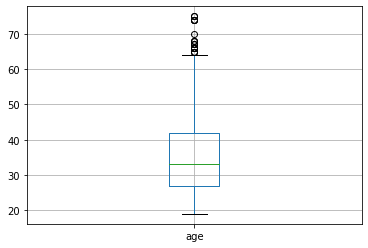



Diagrama para amount


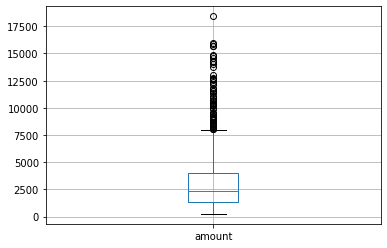



Diagrama para duration


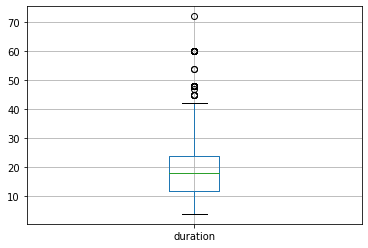

In [13]:
for var in ["age", "amount", "duration"]: #Iteramos sobre cada variable numérica para así construir un boxplot por variable
    print(f"Diagrama para {var}") 
    Xtrain[[var]].boxplot()  #Le decimos a pandas que construya el boxplot para cada variable
    plt.show() #Usamos esta función para "forzar" que se muestre el diagrama, de lo contrario solo aparecerá el último boxplot que se construyó.
    print("\n") #Damos enter para separar un poco los gráficos

In [22]:
#**********************************************************************************************************************************************************************
#Creamos los pipelines para la imputación, la transformación (escalar) de las variables numéricas y para la transformación One-hot de las variables
#categóricas y binarias:
#**********************************************************************************************************************************************************************
#Almacenamos las variables numéricas en una lista para mayor facilidad en su uso
XNumericas=["age", "amount", "duration"]
#Creamos el pipeline para las numéricas con la imputación utilizando la media y el minmax para escalar los datos numéricos a un rango equiparable
pipeline_numericas = Pipeline(steps = [('impMedia', SimpleImputer(strategy='mean')),('scalar', MinMaxScaler(feature_range=(1,2)))])

#Almacenamos las variables categóricas y ordinales en una lista para mayor facilidad en su uso
XCategoricas=["status","credit_history", "purpose", "savings", "personal_status_sex", "other_debtors",
                                                               "other_installment_plans", "housing"]
#Creamos el pipeline para las categóricas con la imputación utilizando la moda y aplicando la transformación One-Hot
pipeline_categoricas = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(drop='first'))])

#Almacenamos las variables binarias en una lista para mayor facilidad en su uso
XBinarias = ["people_liable", "telephone", "foreign_worker"]
#Creamos el pipeline para las categóricas con la imputación utilizando la moda y aplicando la transformación One-Hot
pipeline_binarias = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(drop='first'))])


In [23]:
#Establecemos a "Columnas_Transformar" como la variable para transformar todas las columnas definidas en el punto anterior, llamando los pipeline creados previamente.
Columnas_Transformar = ColumnTransformer(transformers=[('numericas', pipeline_numericas,XNumericas), ('categoricas', pipeline_categoricas, XCategoricas), 
                                                     ('binarias', pipeline_binarias, XBinarias)], remainder='passthrough')
#Aplicamos la transformación de las columnas requeridas (numéricas, categóricas y binarias solamente)
X_train_fit = Columnas_Transformar.fit(Xtrain)
pd.DataFrame(X_train_fit.transform(Xtrain))

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.160714,1.187631,1.294118,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,3.0,2.0,4.0,3.0,1.0,3.0
1,1.375000,1.076868,1.250000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,4.0,2.0,2.0,2.0,2.0
2,1.464286,1.458787,1.514706,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,5.0,4.0,2.0,3.0,1.0,4.0
3,1.142857,1.135248,1.161765,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0
4,1.339286,1.353857,1.647059,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,3.0,4.0,4.0,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,1.410714,1.066304,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,4.0,2.0,1.0,1.0,3.0,2.0
846,1.142857,1.238032,1.602941,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,3.0,4.0,3.0,1.0,3.0
847,1.071429,1.178167,1.294118,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,4.0,3.0,4.0,3.0,1.0,3.0
848,1.035714,1.139155,1.205882,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,3.0


#**Ejercicio-4.**

In [ ]:
None

#**Ejercicio-5.**

In [ ]:
None

#**Ejercicio-6.**

In [ ]:
None

###**Fin de la Actividad de la semana 6.**